Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9357994..1.2825546].


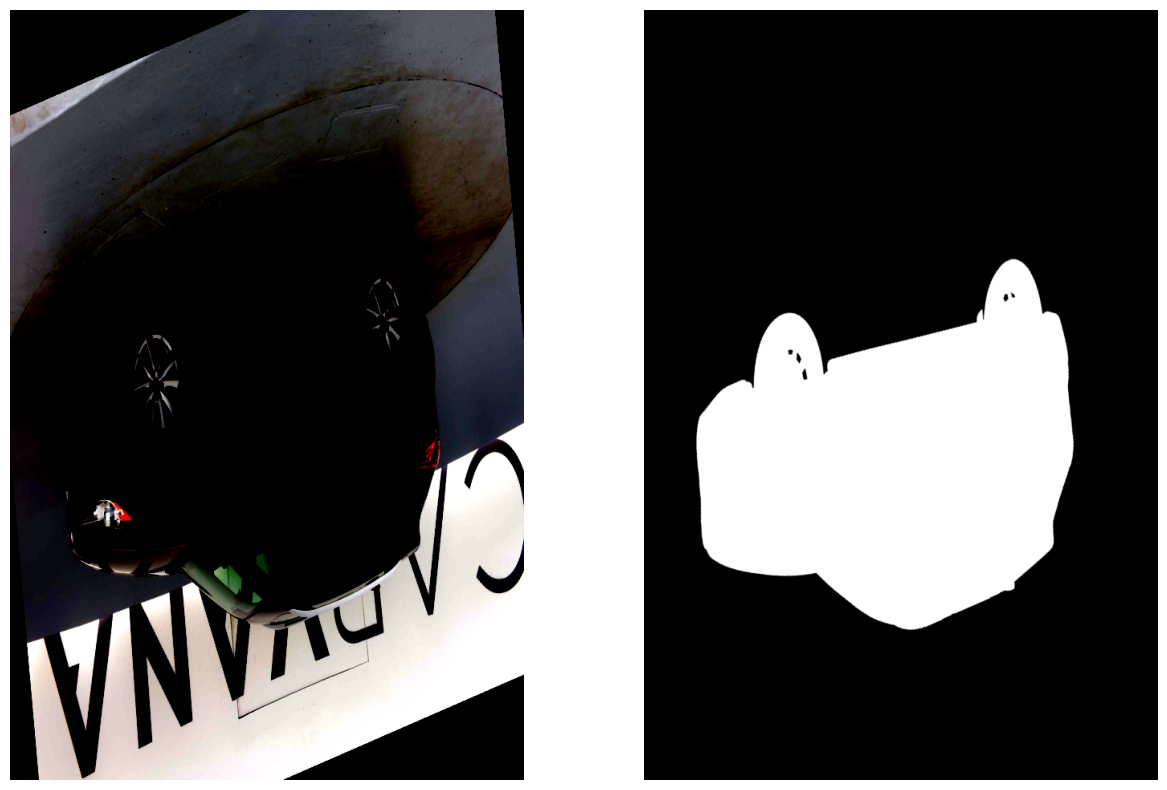

In [12]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from typing import cast

from unet.dataset import CarvanaDataset
from unet.utils import CombinedTransform

np.random.seed(42)

DATASET_ROOT = "/home/mukesh/.cache/kagglehub/datasets/ipythonx/carvana-image-masking-png/versions/1"
TARGET_SIZE = (960, 640)
PIN_MEMORY = True
NUM_WORKERS = 2

img_additional_transform = T.Compose(
    [T.Resize(TARGET_SIZE), T.ToTensor(), T.Normalize(mean=0.6905, std=0.2352)]
)
mask_additional_transform = T.Compose([T.Resize(TARGET_SIZE), T.ToTensor()])

train_transform = CombinedTransform(
    rotation_degrees=15.0,
    img_additional_transform=img_additional_transform,
    mask_additional_transform=mask_additional_transform,
)
test_transform = CombinedTransform(
    rotation_degrees=0,
    h_flip_prob=0,
    v_flip_prob=0,
    img_additional_transform=img_additional_transform,
    mask_additional_transform=mask_additional_transform,
)

train_dataset = CarvanaDataset(
    root=DATASET_ROOT, split="train", combined_transform=train_transform
)
test_dataset = CarvanaDataset(
    root=DATASET_ROOT, split="test", combined_transform=test_transform
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    pin_memory=PIN_MEMORY,
    num_workers=NUM_WORKERS,
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    pin_memory=PIN_MEMORY,
    num_workers=NUM_WORKERS,
)

_, axes = plt.subplots(1, 2, figsize=[15, 10])

img, mask = train_dataset[0]

img = cast(torch.Tensor, img)
mask = cast(torch.Tensor, mask)

img_display = img.permute(1, 2, 0).numpy()
mask_display = mask.squeeze(0).numpy()

# Display the images
axes[0].imshow(img_display)
axes[0].axis('off')

axes[1].imshow(mask_display, cmap='gray') 
axes[1].axis('off')

plt.show()